## Comparação diferentes clusterizadores

https://scikit-learn.org/stable/modules/clustering.html

**Novo clusterizador**: O DBSCAN (*Density-based spatial clustering of applications with noise*) é um método não-supervisionado que clusteriza amostras principais (área com alta densidade de dados) e identifica amostras que não são principais (área com baixa densidade de dados). É um excelente algoritmo para identificar grupos de outlier

In [1]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

In [2]:
np.random.seed(0)

In [3]:
# Gerar os datasets
n_samples = 500

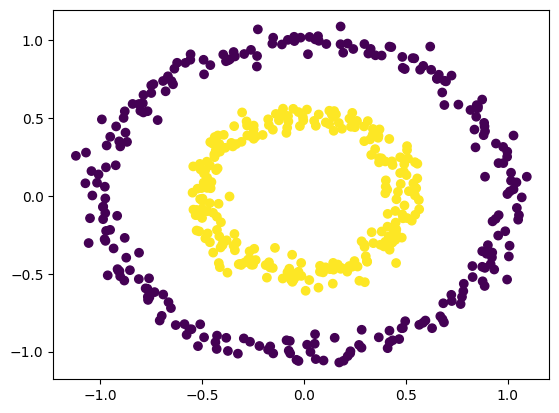

In [4]:
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5,
                                      noise=0.05)
plt.scatter(noisy_circles[0][:,0], noisy_circles[0][:,1], c=noisy_circles[1])

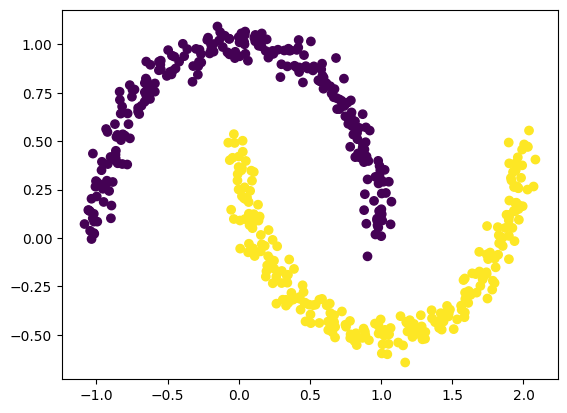

In [5]:
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
plt.scatter(noisy_moons[0][:,0], noisy_moons[0][:,1], c=noisy_moons[1])

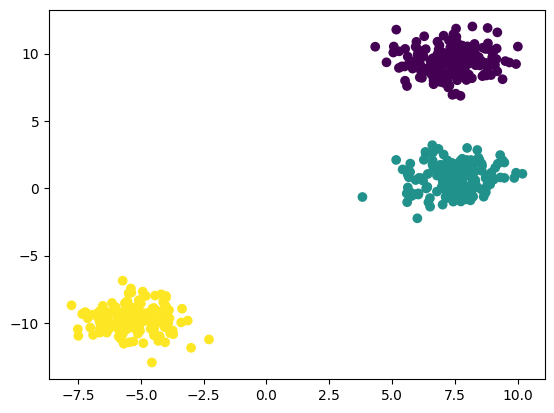

In [6]:
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
plt.scatter(blobs[0][:,0], blobs[0][:,1], c=blobs[1])

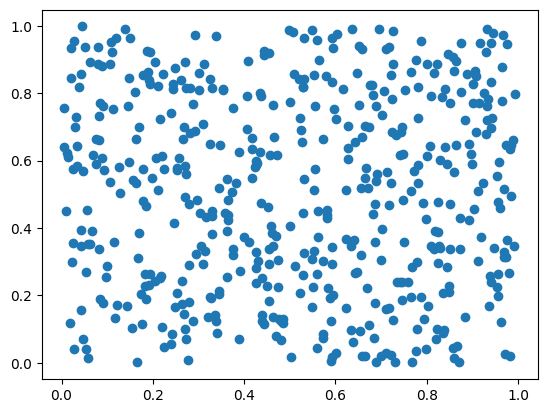

In [7]:
no_structure = np.random.rand(n_samples, 2), None
plt.scatter(no_structure[0][:,0], no_structure[0][:,1], c=no_structure[1])

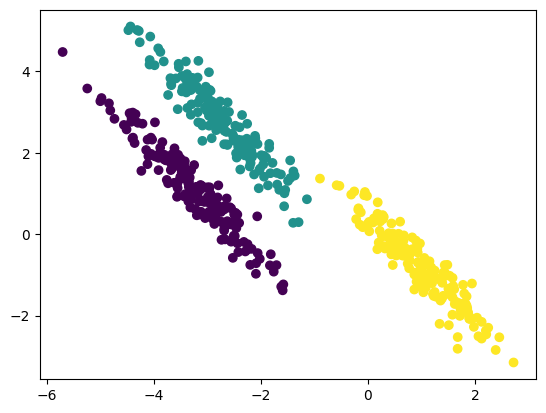

In [8]:
# Dados distribuídos de forma anisotrópica (Anisotropicly distributed data)
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

plt.scatter(aniso[0][:,0], aniso[0][:,1], c=aniso[1])

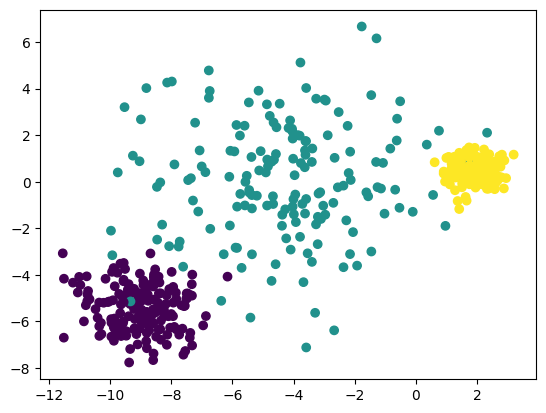

In [9]:
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)
plt.scatter(varied[0][:,0], varied[0][:,1], c=varied[1])

In [164]:
# Para cada dataset, especificar os parâmetros dos clusterizadores
datasets = [
  (noisy_circles, {'quantile': 0.2, 'eps': 0.3, 'n_clusters':3}),
  (noisy_moons, {'quantile': 0.4, 'eps': 0.25, 'n_clusters':2}),
  (varied, {'quantile': 0.3, 'eps': 0.275, 'n_clusters':3}),
  (aniso, {'quantile': 0.15, 'eps': 0.266, 'n_clusters':3}),
  (blobs, {'quantile': 0.25, 'eps': 0.3, 'n_clusters':3}),
  (no_structure, {'quantile': 1.0, 'eps': 0.5, 'n_clusters':1})
]

In [165]:
plt.figure(figsize=(9 * 3 + 3, 20))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

<Figure size 3000x2000 with 0 Axes>

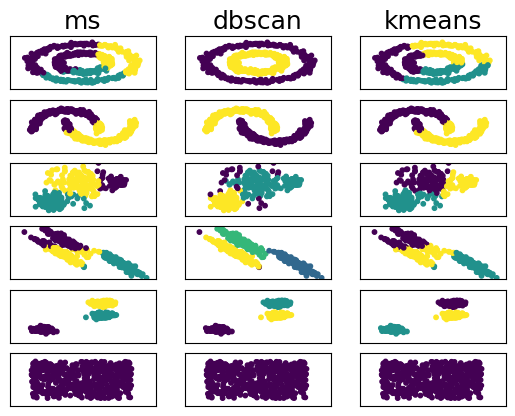

In [166]:
plot_num = 1
for i_dataset, (dataset, params) in enumerate(datasets):
  X, y = dataset
  X = StandardScaler().fit_transform(X)
  bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

  ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
  dbscan = cluster.DBSCAN(eps=params['eps'])
  kmeans = cluster.KMeans(n_clusters=params['n_clusters'], n_init='auto')

  clustering_algorithms = [('ms', ms), ('dbscan', dbscan), ('kmeans', kmeans)]
  for name, algorithm in clustering_algorithms:
    algorithm.fit(X)
    y_pred = algorithm.labels_.astype(int)

    plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
    if i_dataset == 0:
      plt.title(name, size=18)
    plt.scatter(X[:, 0], X[:, 1], s=10, c=y_pred)
    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)
    plt.xticks(())
    plt.yticks(())
    plot_num += 1